In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import pandas as pd
import array_to_latex as ltx

In [3]:
def covariance(x,y):
    c=np.inner(y,x)/len(x)-(sum(x)/len(x))*(sum(y)/len(y))
    return c
def rate_error(x,y,k):
    c = ((len(y)-2)**-0.5)*((covariance(y,y)/covariance(x,x)-k**2)**0.5)
    return c

In [4]:
data_array = pd.read_csv("datacsv.csv",  sep=";", decimal=",")
t1=data_array.loc[:14,:].to_numpy()
t2=data_array.loc[15:,:].to_numpy()
tabular1=np.transpose(t1)
tabular2=np.transpose(t2)
data_array

,%,m,t,N,h,град,T,град.сек
0,1,61,168.4,1,5,2.37,168.4,0.014
1,2,61,170.9,1,5,2.37,170.9,0.014
2,3,93,221.3,2,8,3.79,110.7,0.017
3,4,93,222.6,2,7,3.32,111.3,0.015
4,5,93,221.6,2,8,3.79,110.8,0.017
5,6,142,216.6,3,9,4.26,72.2,0.020
6,7,142,215,3,8,3.79,71.7,0.018
7,8,142,215.8,3,9,4.26,71.9,0.020
8,9,214,143,3,4,1.90,47.7,0.013
9,10,214,143,3,3,1.42,47.7,0.010


In [5]:
ltx.to_ltx(data_array.loc[:13,:])


\begin{tabular}{lrrrrrrrr}
\toprule
     & % & m & t & N & h & град & T & град.сек \\\n\midrule
 0 &  1  &  61  &  168.4 &  1 &  5 &  2.37 &  168.4 &  0.014\\
 1 &  2  &  61  &  170.9 &  1 &  5 &  2.37 &  170.9 &  0.014\\
 2 &  3  &  93  &  221.3 &  2 &  8 &  3.79 &  110.7 &  0.017\\
 3 &  4  &  93  &  222.6 &  2 &  7 &  3.32 &  111.3 &  0.015\\
 4 &  5  &  93  &  221.6 &  2 &  8 &  3.79 &  110.8 &  0.017\\
 5 &  6  &  142 &  216.6 &  3 &  9 &  4.26 &  72.2  &  0.020\\
 6 &  7  &  142 &  215   &  3 &  8 &  3.79 &  71.7  &  0.018\\
 7 &  8  &  142 &  215.8 &  3 &  9 &  4.26 &  71.9  &  0.020\\
 8 &  9  &  214 &  143   &  3 &  4 &  1.90 &  47.7  &  0.013\\
 9 &  10 &  214 &  143   &  3 &  3 &  1.42 &  47.7  &  0.010\\
 10 &  11 &  335 &  122.2 &  4 &  5 &  2.37 &  30.6  &  0.019\\
 11 &  12 &  335 &  123.7 &  4 &  5 &  2.37 &  30.9  &  0.019\\
 12 &  13 &  335 &  125.1 &  4 &  4 &  1.90 &  31.3  &  0.015\\
 13 &  14 &  335 &  122.7 &  4 &  5 &  2.37 &  30.7  &  0.019\\
\bottomrule
\end{t

In [6]:
ltx.to_ltx(data_array.loc[15:,:])

\begin{tabular}{lrrrrrrrr}
\toprule
     & % & m & t & N & h & град & T & град.сек \\\n\midrule
 15 &  % &  m   &  T     &  dt  &  Q, 10-2 &  dQ,10-2 &  M, 10 Нм &  dM \\
 16 &  1 &  61  &  169.7 &  1.6 &  3.70    &  0.03    &  7.2      &  0.1\\
 17 &  2 &  93  &  110.9 &  0.1 &  5.66    &  0.01    &  11.0     &  0.1\\
 18 &  3 &  142 &  71.9  &  0.1 &  8.73    &  0.01    &  16.9     &  0.1\\
 19 &  4 &  214 &  47.7  &  0.1 &  13.18   &  0.03    &  25.4     &  0.2\\
 20 &  5 &  335 &  30.9  &  0.1 &  20.36   &  0.08    &  39.8     &  0.3\\
\bottomrule
\end{tabular}


In [7]:
Q,M=tabular2[4,1:].astype(float),tabular2[6,1:].astype(float)


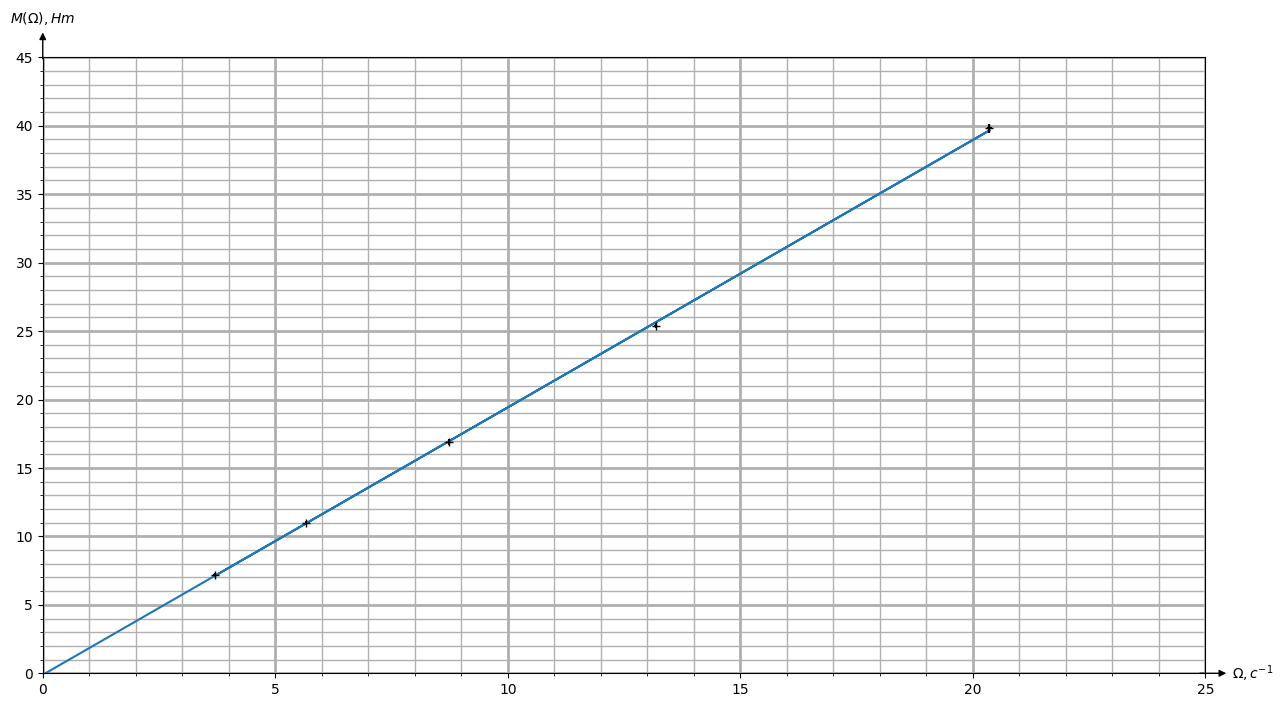

In [17]:
plt.figure(figsize=(15,8))

k,b=np.polyfit(Q,M,1)

M_fit=b+k*np.append(Q,0)
plt.plot(np.append(Q,0),M_fit)

x_err=np.array([0.03,0.01,0.01,0.03,0.05])
y_err=np.array([0.1,0.1,0.2,0.2,0.3])
plt.errorbar(Q,M, yerr=y_err, xerr=x_err, color='k',fmt='+', label='Кресты') 

plt.xlim(0,25)
plt.ylim(0, 45)

#— Decorate the spins
arrow_length = 25 # In points

# X-axis arrow
plt.annotate('$\Omega, c^{-1}$', xy=(0.993, 0), xycoords=('axes fraction', 'data'),
xytext=(arrow_length, 0), textcoords='offset points',
ha='left', va='center',
arrowprops=dict(arrowstyle='<|-', fc='black'))

# Y-axis arrow
plt.annotate('$M(\Omega), Hm$', xy=(0, 0.993), xycoords=('data', 'axes fraction'),
xytext=(0, arrow_length), textcoords='offset points',
ha='center', va='bottom',
arrowprops=dict(arrowstyle='<|-', fc='black'))

plt.minorticks_on()
plt.grid(which='major', lw=2)
plt.grid(which='minor', lw=1)

plt.show()

In [ ]:
k

1.9533517026235423

In [ ]:
Q

array([ 3.7 ,  5.66,  8.73, 13.18, 20.36])

In [ ]:
rate_error(Q,M,1.95)

0.06725803525842246

In [ ]:
data_momentcvs=pd.read_csv("momentcvs.csv",  sep=";", decimal=",")
#ltx.to_ltx(data_momentcvs.loc[:3,:])
data_momentcvs

,"T20,ротор","Т20,цилиндр","T,ротор","Т,цилиндр"
0,63.6,78.8,3.18,3.94
1,64.2,78.7,3.21,3.935
2,66.6,81,3.33,4.05
3,NaN,NaN,0.004,0.003
4,"m,гр","r,мм",3.24,3.975
5,1616.9,39,0.005,NaN
6,"I,10+3",NaN,I.р,NaN
7,1.22965245,NaN,0.816954998,NaN


In [ ]:
ltx.to_ltx(data_momentcvs.loc[:2,:])

\begin{tabular}{lrrrr}
\toprule
     & T20,ротор & Т20,цилиндр & T,ротор & Т,цилиндр \\\n\midrule
 0 &  63.6 &  78.8 &  3.18 &  3.94 \\
 1 &  64.2 &  78.7 &  3.21 &  3.935\\
 2 &  66.6 &  81   &  3.33 &  4.05 \\
\bottomrule
\end{tabular}
